In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score


Loading the dataset:

In [ ]:
# Load the dataset
df = pd.read_csv('/content/cleaned_data_DX.csv')

In [ ]:
print(df)


     Gender  Age Handedness  DX  ADHD Measure  ADHD Index  Inattentive  \
0         1   17          1   0             2        52.0         52.0   
1         1   16          1   0             2        30.0         29.0   
2         0   15          1   0             2        30.0         29.0   
3         0   15          1   0             2        30.0         29.0   
4         1   17          0   0             2        52.0         52.0   
..      ...  ...        ...  ..           ...         ...          ...   
545       1   12          1   0             2        23.0         22.0   
546       1   14          1   0             2        30.0         29.0   
547       0   13          0   0             2        23.0         22.0   
548       1   16          1   0             2        30.0         29.0   
549       0   10          1   0             2        37.0         41.0   

     Hyper/Impulsive  IQ Measure  Verbal IQ  Performance IQ  Full4 IQ  \
0               50.0           2      

In [ ]:
import pandas as pd
df_filled = df.apply(lambda x: x.fillna(x.mode()[0]))
# Convert 'Handedness' column to numeric type (float)
df_filled['Handedness'] = pd.to_numeric(df_filled['Handedness'], errors='coerce')

# Replace all decimal values of the 'Handedness' column with round figures of either 0 or 1
df_filled['Handedness'] = df_filled['Handedness'].apply(lambda x: round(x) if not pd.isnull(x) else x)

# Now, you can proceed with the rest of your code


In [ ]:
import numpy as np

# Replace all non-integer and non-NaN values of the 'Handedness' column with either 0 or 1
df_filled['Handedness'] = df_filled['Handedness'].apply(lambda x: round(x) if isinstance(x, float) and not np.isnan(x) else x)

# Replace -999 with 0 or 1 (you can choose)
df_filled['Handedness'].replace(-999, 0, inplace=True)  # Replace -999 with 0
# Print unique values in the 'Handedness' column after replacement
print("\nUnique values in 'Handedness' column after replacement:")
print(df_filled['Handedness'].unique())

# Print the 'Handedness' column without truncation
with pd.option_context('display.max_rows', None):
    print(df_filled['Handedness'])






Unique values in 'Handedness' column after replacement:
[ 1.  0.  2. nan]
0      1.0
1      1.0
2      1.0
3      1.0
4      0.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
30     1.0
31     1.0
32     1.0
33     1.0
34     1.0
35     1.0
36     1.0
37     1.0
38     1.0
39     1.0
40     1.0
41     0.0
42     1.0
43     1.0
44     1.0
45     1.0
46     0.0
47     1.0
48     1.0
49     1.0
50     1.0
51     0.0
52     1.0
53     1.0
54     1.0
55     1.0
56     1.0
57     1.0
58     0.0
59     1.0
60     1.0
61     1.0
62     1.0
63     1.0
64     1.0
65     1.0
66     1.0
67     1.0
68     1.0
69     1.0
70     1.0
71     0.0
72     1.0
73     1.0
74     1.0
75     1.0
76     1.0
77     1.0
78     0.0
79     1.0
80     1.0
81     1.0
82     1.0
83     1.0
8

Cleaning Med Status Attribute:

In [ ]:
# Calculate the mode of 'Med Status' column
mode_med_status = df['Med Status'].mode()[0]

# Replace -999 values with the mode
df['Med Status'] = df['Med Status'].replace(-999, mode_med_status)

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Print the entire 'Med Status' column
print(df['Med Status'])

# Reset display option to default
pd.reset_option('display.max_rows')
print(df['Med Status'].unique())


0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    1
110    1
1

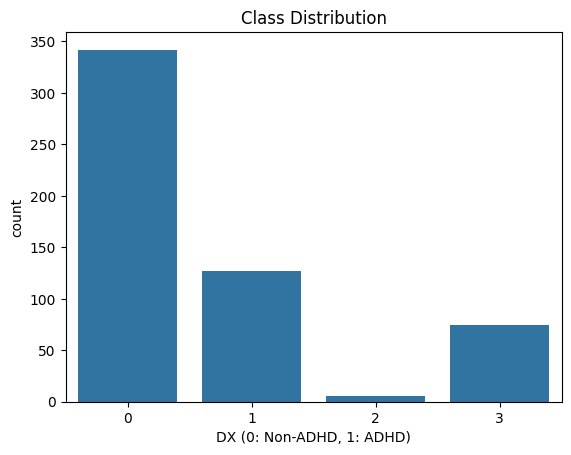

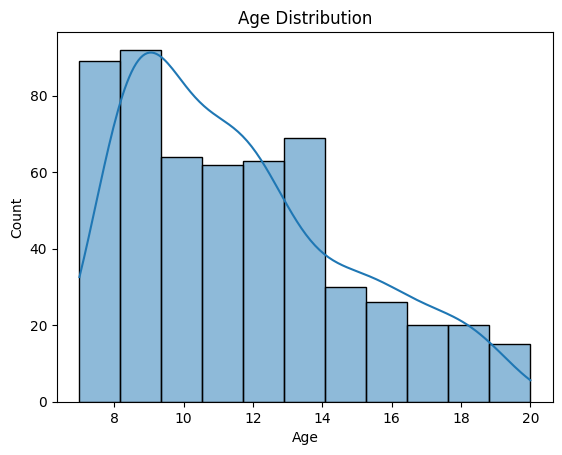

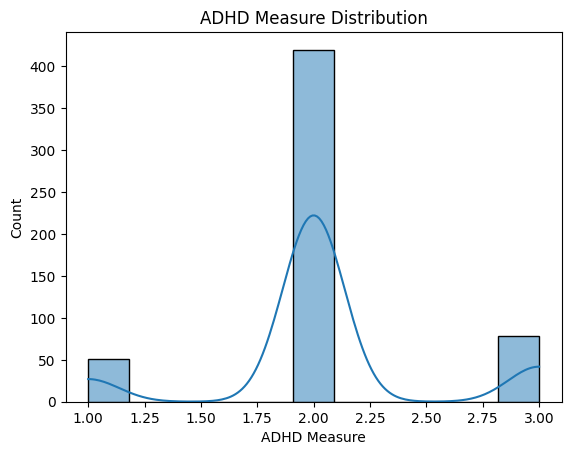

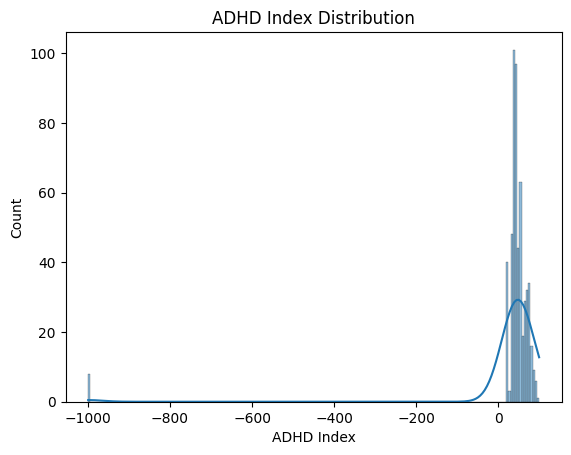

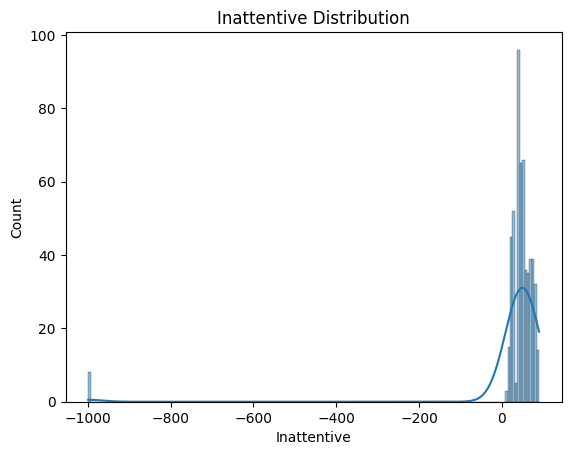

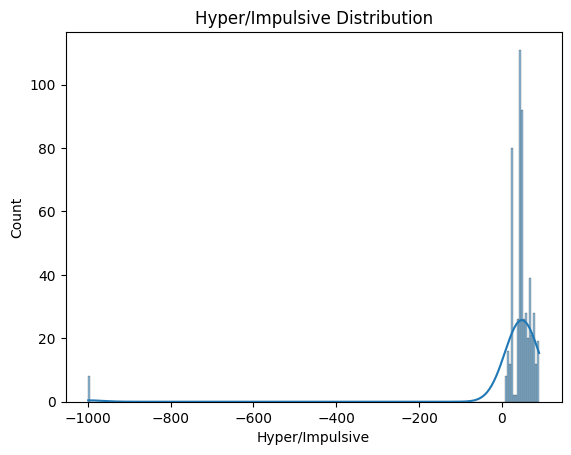

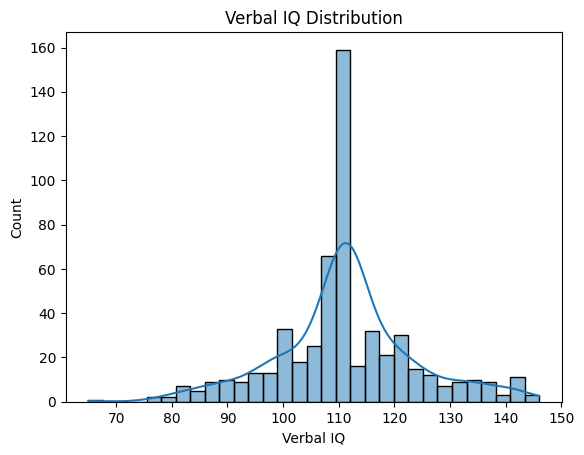

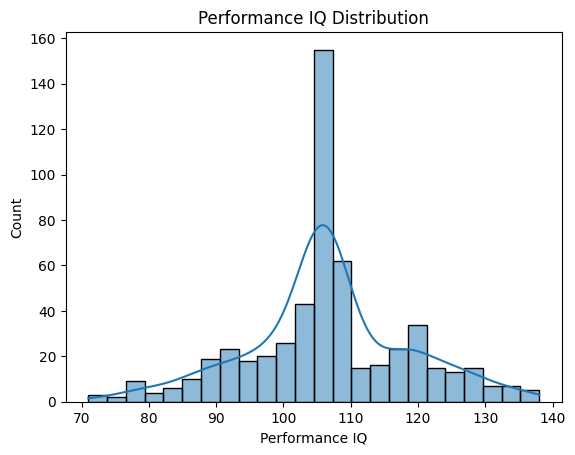

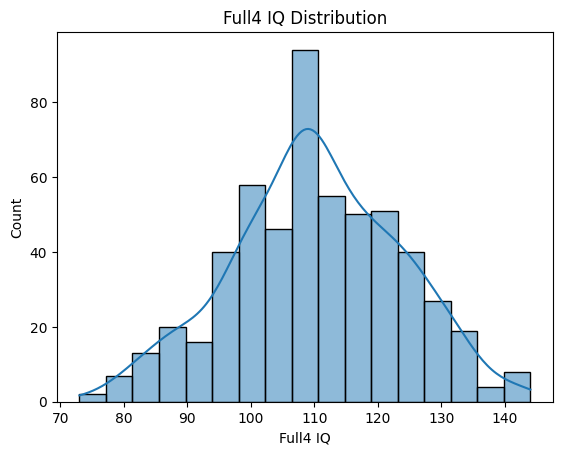

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class Distribution
sns.countplot(x='DX', data=df)
plt.title('Class Distribution')
plt.xlabel('DX (0: Non-ADHD, 1: ADHD)')
plt.show()

# Feature Distribution
numeric_features = ["Age", "ADHD Measure", "ADHD Index", "Inattentive", "Hyper/Impulsive", "Verbal IQ", "Performance IQ", "Full4 IQ"]

for feature in numeric_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()




In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('/content/cleaned_data_DX.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Handedness', 'Med Status']  # Add other categorical columns as needed
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features (X) and the target variable (y)
X = df.drop(columns=['DX'])  # Features
y = df['DX']  # Target variable (diagnosis)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [ ]:
# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y_train_pred = nb_classifier.predict(X_train)

# Calculate the accuracy of the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print the accuracy
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.5772727272727273


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the testing data
y_test_pred = nb_classifier.predict(X_test)

# Calculate the accuracy of the model on the testing data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the testing accuracy
print("Testing Accuracy:", test_accuracy)

# Generate and print the classification report
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))


Testing Accuracy: 0.6

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        73
           1       0.58      0.42      0.49        26
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00        11

    accuracy                           0.60       110
   macro avg       0.36      0.29      0.32       110
weighted avg       0.71      0.60      0.65       110



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Update the input data to match the feature names seen during training
input_data = {
    'Age': [16],
    'ADHD Measure': [2],
    'ADHD Index': [70],
    'Inattentive': [77],
    'Hyper/Impulsive': [62],
    'IQ Measure': [2],
    'Verbal IQ': [132],
    'Performance IQ': [107],
    'Full4 IQ': [122],
    'Med Status': [1],
    'Gender': [1],  # Assuming 1 represents Female
    'Handedness': [1]  # Assuming 1 represents Right-handed
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Ensure the correct order of columns
input_df = input_df[['Age', 'ADHD Measure', 'ADHD Index', 'Inattentive', 'Hyper/Impulsive',
                     'IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ', 'Med Status',
                     'Gender', 'Handedness']]

# Make predictions on the input data
predictions = nb_classifier.predict(input_df)

# Print the predicted class labels
print("Predicted DX status:", predictions)

# Make predictions on the input data
predicted_probabilities = nb_classifier.predict_proba(input_df)

# Determine the predicted severity level for each input data point
predicted_severity_levels = []

# Iterate over each predicted probability array
for probs in predicted_probabilities:
    # Determine the index of the maximum probability
    predicted_severity_index = np.argmax(probs)
    # Map the index to the severity level
    predicted_severity_level = severity_levels[predicted_severity_index]
    # Append the predicted severity level to the list
    predicted_severity_levels.append(predicted_severity_level)

# Print the predicted severity levels
print("Predicted ADHD Severity Levels:", predicted_severity_levels)


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.
